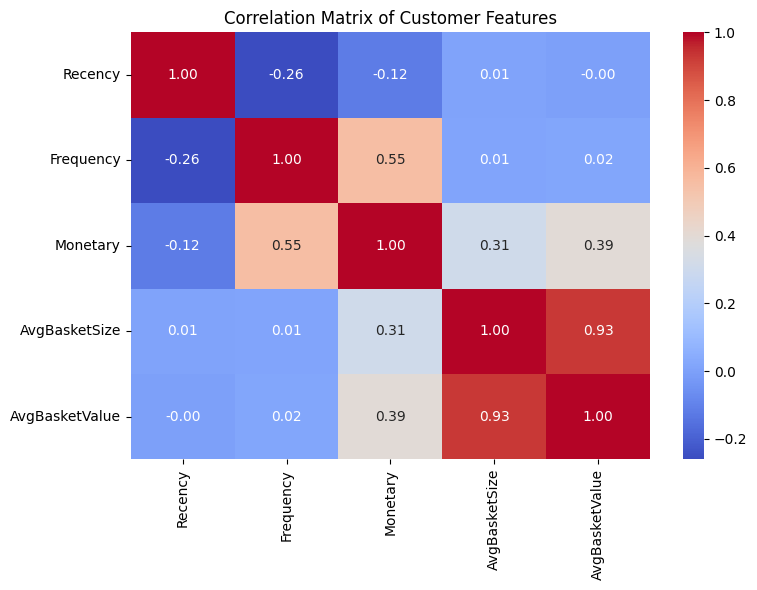

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the engineered data
df = pd.read_csv(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\data\cleaned\customer_features.csv")

# Select numeric features
features = ["Recency", "Frequency", "Monetary", "AvgBasketSize", "AvgBasketValue"]
corr_matrix = df[features].corr()

# 1. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Customer Features")
plt.tight_layout()
plt.savefig(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\reports\figures\feature_correlation.png")
plt.show()


In [3]:
from scipy.stats import ttest_ind

# Define groups
high_freq = df[df["Frequency"] > df["Frequency"].median()]["Monetary"]
low_freq = df[df["Frequency"] <= df["Frequency"].median()]["Monetary"]

# Perform t-test
t_stat, p_value = ttest_ind(high_freq, low_freq, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Statistically significant: High frequency customers spend more.")
else:
    print("❌ Not statistically significant: No strong difference in spending.")


T-statistic: 11.10
P-value: 0.0000
✅ Statistically significant: High frequency customers spend more.


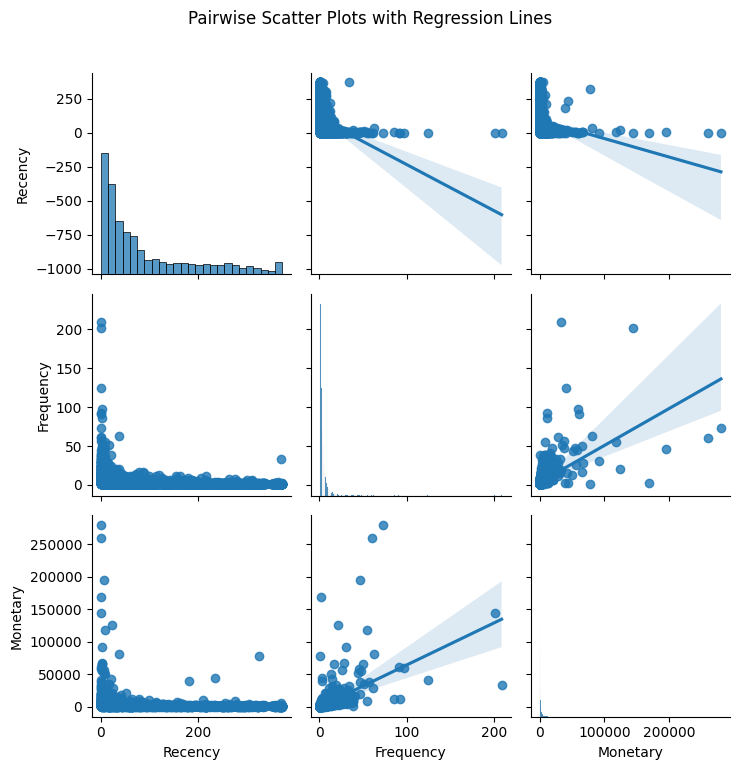

In [4]:
sns.pairplot(df[["Recency", "Frequency", "Monetary"]], kind='reg')
plt.suptitle("Pairwise Scatter Plots with Regression Lines", y=1.02)
plt.tight_layout()


In [5]:
from scipy.stats import skew, kurtosis

for col in ["Recency", "Frequency", "Monetary"]:
    print(f"{col}: Skew = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")


Recency: Skew = 1.25, Kurtosis = 0.43
Frequency: Skew = 12.06, Kurtosis = 248.77
Monetary: Skew = 19.32, Kurtosis = 477.50
